<a href="https://colab.research.google.com/github/NajwaaAzzahra/PCVK_Ganjil_2024/blob/main/Modul5_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Najwa Azzahra
#TI-3C/19
#2241720139

**Modul 5 PCVK**

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import glob
import math

Mounted at /content/drive


Gamma Correction pada citra
----------------------------
Masukkan Nilai Gamma  : 3


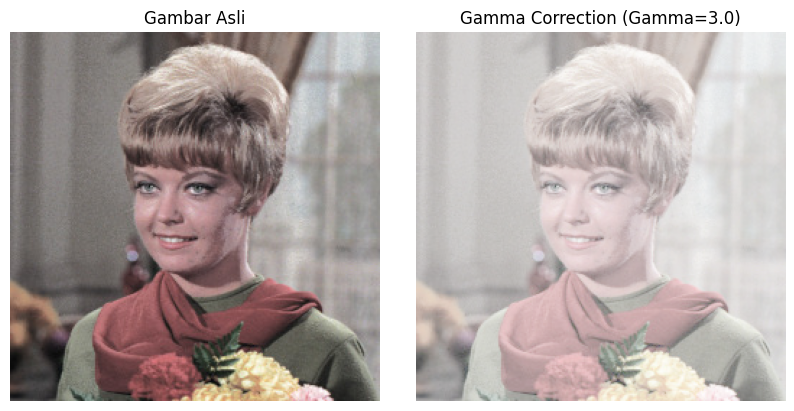

In [6]:
print('Gamma Correction pada citra')
print('----------------------------')

try:
    gamma = float(input('Masukkan Nilai Gamma  : '))
except ValueError:
    print('Nilai Gamma harus berupa angka')

image = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/modul5-1.jpg')

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

gamma_corrected = adjust_gamma(image, gamma)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gamma_corrected, cv.COLOR_BGR2RGB))
plt.title(f'Gamma Correction (Gamma={gamma})')
plt.axis('off')
plt.subplots_adjust(wspace=0.1)
plt.show()

**2. Buat Simulasi Image Depth**
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

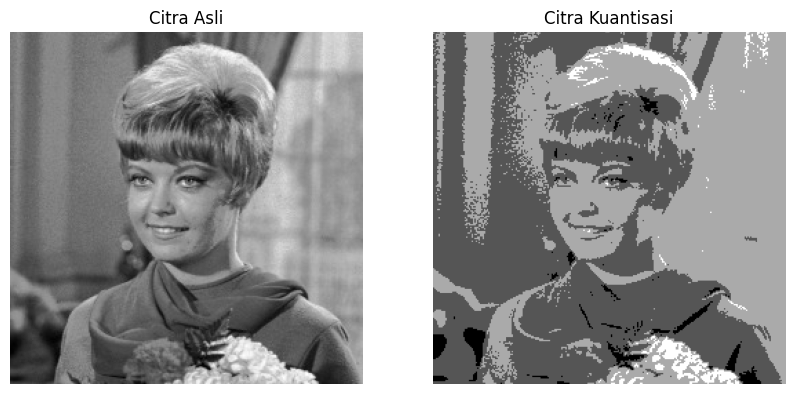

In [10]:
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

original = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/modul5-1.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Kuantisasi citra
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

# Tampilkan citra asli dan citra yang telah dikuantisasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title('Citra Kuantisasi')
plt.axis('off')

plt.show()

**3. Buat modul Average Denoising**
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.  
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).

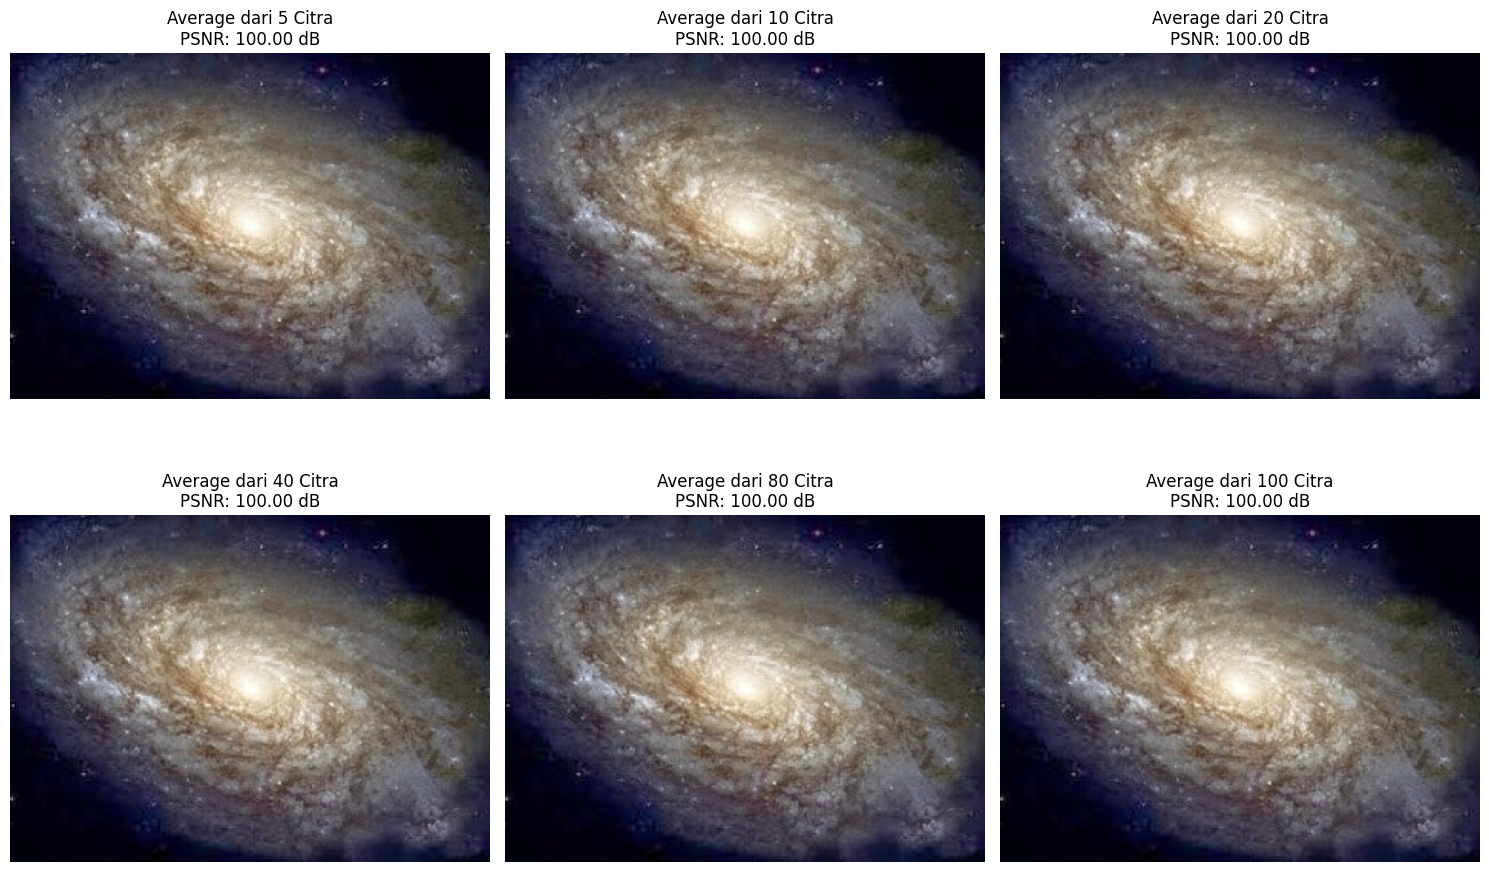

In [17]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

def load_image(path):
    img = cv.imread(path)
    if img is None:
        print("Gambar asli tidak ditemukan. Periksa jalur file.")
        return None
    return img

def average_images(images, num_images):
    average_image = np.zeros(images[0].shape, np.float32)
    for img in images[:num_images]:
        average_image += img.astype(np.float32)
    average_image /= num_images
    average_image = np.clip(average_image, 0, 255)
    average_image = cv.convertScaleAbs(average_image)
    return average_image

def main():
    original_image = load_image('/content/drive/MyDrive/SEMESTER 5/PCVK/modul5-3.jpg')
    if original_image is None:
        return

    cv_img = [original_image] * 100
    psnr_values = []

    for i in [5, 10, 20, 40, 80, 100]:
        average_image = average_images(cv_img, i)
        psnr_value = psnr(original_image, average_image)
        psnr_values.append((i, average_image, psnr_value))

    num_plots = len(psnr_values)
    cols = 3
    rows = (num_plots + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(15, 10), tight_layout=True)
    axs = axs.flatten()

    for idx, (num_images, avg_img, psnr_val) in enumerate(psnr_values):
        axs[idx].imshow(cv.cvtColor(avg_img, cv.COLOR_BGR2RGB))
        axs[idx].set_title(f'Average dari {num_images} Citra\nPSNR: {psnr_val:.2f} dB')
        axs[idx].axis('off')

    for j in range(num_plots, len(axs)):
        axs[j].axis('off')

    plt.show()

if __name__ == "__main__":
    main()

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

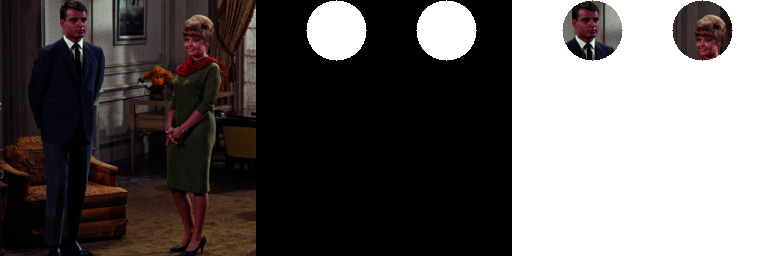

In [42]:
original_image = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/modul5-2.jpg')
mask = np.zeros(original_image.shape, np.uint8)

cv.circle(mask, center=(190, 30), radius=30, color=(255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, center=(80, 30), radius=30, color=(255, 255, 255), thickness=cv.FILLED)

masked = cv.bitwise_and(original_image, mask)
whitebg = np.full(original_image.shape, 255, dtype=np.uint8)
res = np.where(mask != 0, masked, whitebg)

final_frame = cv.hconcat([original_image, mask, res])

cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

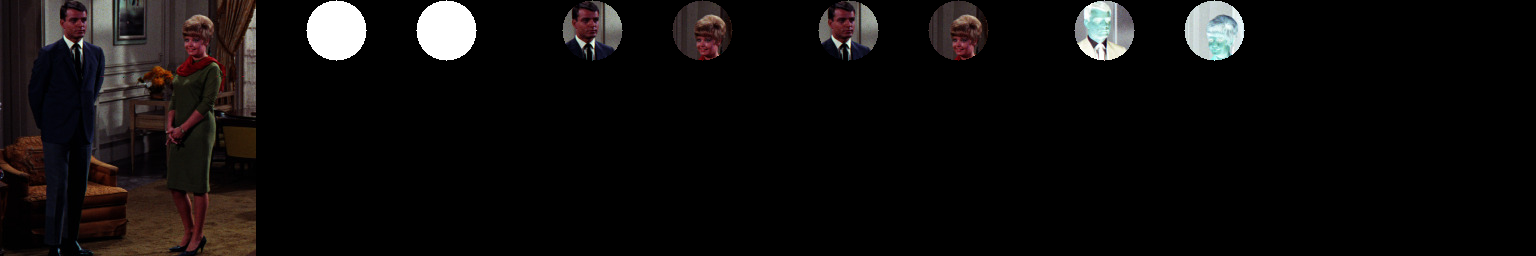

In [52]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca gambar
original_image = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/modul5-2.jpg')

# Membuat mask
mask = np.zeros(original_image.shape[:2], np.uint8)

cv2.circle(mask, center=(190, 30), radius=30, color=255, thickness=cv2.FILLED)
cv2.circle(mask, center=(80, 30), radius=30, color=255, thickness=cv2.FILLED)

# Operator logika
masked_and = cv2.bitwise_and(original_image, original_image, mask=mask)
masked_or = cv2.bitwise_or(original_image, original_image, mask=mask)
masked_not = cv2.bitwise_not(original_image, mask=mask)
masked_xor = cv2.bitwise_xor(original_image, original_image, mask=mask)

# Menggabungkan gambar asli dan hasil masking
final_frame = cv2.hconcat([original_image,
                           cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR),
                           masked_and,
                           masked_or,
                           masked_not,
                           masked_xor])

# Menampilkan hasil
cv2_imshow(final_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()